In [1]:
import numpy as np
import pandas as pd

import time
import statistics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import  MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

from sklearn import preprocessing
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

In [2]:
match_path = "D:\Git_desktop\Intro_data_science_new\Crawl_data_and _reformat_data\match_all_season.csv"
player_path = "D:/Git_desktop/Intro_data_science_new/Crawl_data_and _reformat_data/player_all_season.csv"

match_df = pd.read_csv(match_path)
player_df = pd.read_csv(player_path)

player_df = player_df.replace(-1, 0)

C:\Users\ngduc\AppData\Local\Temp\ipykernel_15228\1584857749.py:4: DtypeWarning: Columns (9,277) have mixed types. Specify dtype option on import or set low_memory=False.
  match_df = pd.read_csv(match_path)


In [3]:
for i in player_df.columns:
    print(i)

Unnamed: 0
id
playerId
name
season
position
shirtNum
positionInfo
country
birth
age
accurate_back_zone_pass
accurate_chipped_pass
accurate_corners_intobox
accurate_cross
accurate_cross_nocorner
accurate_flick_on
accurate_freekick_cross
accurate_fwd_zone_pass
accurate_long_balls
accurate_pass
accurate_pull_back
accurate_throws
aerial_lost
aerial_won
appearances
attempted_tackle_foul
attempts_conceded_ibox
attempts_conceded_obox
attempts_ibox
attempts_obox
att_assist_openplay
att_assist_setplay
att_bx_centre
att_bx_left
att_corner
att_hd_target
att_hd_total
att_ibox_blocked
att_ibox_miss
att_ibox_target
att_lf_target
att_lf_total
att_miss_high_right
att_obox_blocked
att_obx_centre
att_openplay
att_sv_low_centre
att_sv_low_left
backward_pass
ball_recovery
big_chance_created
big_chance_missed
blocked_cross
blocked_pass
blocked_scoring_att
challenge_lost
clean_sheet
corner_taken
crosses_18yard
crosses_18yardplus
dispossessed
draws
duel_lost
duel_won
effective_blocked_cross
effective_clearan

In [4]:
goalkeeper_att = ['saves',
                  'penalty_save',
                  'goals_conceded',
                  'clean_sheet',
                  'punches',
                  'total_throws',
                  'total_high_claim',
                  'good_high_claim',
                  'error_lead_to_goal',
                  'goal_kicks',
                  'accurate_long_balls']
defender_att = ['blocked_cross',
                'blocked_pass',
                'blocked_scoring_att',
                'interception',
                'won_tackle',
                'duel_won',
                'duel_lost',
                'big_chance_created',
                'error_lead_to_goal',
                'aerial_won',
                'aerial_lost',
                'total_clearance',
                'ball_recovery',
                'fifty_fifty',
                'total_att_assist',
                'accurate_cross',
                'accurate_long_balls',
                'total_cross',
                'total_tackle',
                'effective_head_clearance']
midfielder_att = ['accurate_pass',
                  'goals',
                  'total_pass',
                  'big_chance_created',
                  'big_chance_missed',
                  'big_chance_scored',
                  'shot_off_target',
                  'penalty_won',
                  'accurate_freekick_cross',
                  'total_clearance',
                  'goals',
                  'interception',
                  'duel_won',
                  'duel_lost',
                  'accurate_goal_kicks',
                  'total_tackle',
                  'won_tackle',
                  'aerial_won',
                  'aerial_lost',
                  'fifty_fifty',
                  'successful_final_third_passes',
                  'total_final_third_passes',
                  'total_att_assist',
                  'effective_head_clearance',
                  'accurate_long_balls', ]
forward_att = ['accurate_pass',
               'goals',
               'big_chance_scored',
               'big_chance_created',
               'big_chance_missed',
               'total_tackle',
               'interception',
               'penalty_won',
               'total_clearance',
               'shot_off_target',
               'shot_fastbreak',
               'total_att_assist',
               'accurate_freekick_cross',
               'goal_assist',
               'total_scoring_att',
               'duel_won',
               'duel_lost',
               'total_distance_in_m',
               'effective_head_clearance']

In [5]:
##only get matches from 2015-2016 to present because of enough information
col = ["score_1", "score_2", "season","formation_1"] + ["lineup_player_id_"+str(i)+"_1" for i in range(11)] + ["formation_2"] + ["lineup_player_id_"+str(i)+"_2" for i in range(11)]

match_df1 = match_df.loc[match_df["season"] >= "2015-16"]
match_df1 = match_df1[col]

In [6]:
print(match_df1)

      score_1  score_2   season formation_1  lineup_player_id_0_1  \
0           4        4  2022-23     4-2-3-1                 99282   
1           2        1  2022-23     4-2-3-1                  5793   
2           2        1  2022-23     4-2-3-1                 13554   
3           1        4  2022-23       5-4-1                 22740   
4           1        0  2022-23     3-4-2-1                 13823   
...       ...      ...      ...         ...                   ...   
3035        1        3  2015-16     4-1-4-1                  4557   
3036        4        2  2015-16       4-4-2                  8976   
3037        2        2  2015-16     4-2-3-1                  4115   
3038        0        1  2015-16       4-4-2                  2338   
3039        1        0  2015-16     4-2-3-1                  4615   

      lineup_player_id_1_1  lineup_player_id_2_1  lineup_player_id_3_1  \
0                    19589                  4617                123910   
1                    23

In [7]:
#get data for training
# formation, G, D, M , F
# key_team 
formation_index = {"3-4-2-1": 1,
                  "3-4-3": 2,
                  "3-5-2":3,
                  "4-1-4-1": 4,
                  "4-2-3-1": 5,
                  "4-3-3": 6,
                  "4-4-1-1": 7,
                  "4-4-2": 8}
home = ["lineup_player_id_"+str(i)+"_1" for i in range(11)]
away = ["lineup_player_id_"+str(i)+"_2" for i in range(11)]
# get position_player_id in a team
def get_position(team_id):
    check = True
    team = {"G": [], "M": [], "D": [], "F": []}
    for id_player in team_id:

        player = player_df.loc[player_df["id"] == id_player] 
        try:
            team[player["position"].values[0]].append(id_player)
        except:
            pass
    for i in team:
        if team[i] == []:
            check = False
            print("no exit")
    return team, check

def get_data_G(id_G, season):
    player = player_df.loc[(player_df["id"] == id_G[0]) & (player_df["season"] == season)]
    values = []
    for att in goalkeeper_att:
        values.append(player[att].values[0])
    return values

def get_data_D(id_D, season):
    player = player_df.loc[(player_df["id"].isin(id_D)) & (player_df["season"] == season)]
    values = []
    for att in defender_att:
        values.append(statistics.mean(player[att].values))
    return values

def get_data_M(id_M, season):
    player = player_df.loc[(player_df["id"].isin(id_M)) & (player_df["season"] == season)]
    values = []
    for att in midfielder_att:
        values.append(statistics.mean(player[att].values))
    return values

def get_data_F(id_F, season):
    player = player_df.loc[(player_df["id"].isin(id_F)) & (player_df["season"] == season)]
    values = []
    for att in forward_att:
        values.append(statistics.mean(player[att].values))
    return values

# get player in two team
def get_player_id_in_match():
    i = 0
    label = []
    data = []
    for row in match_df1.iterrows():
        home_team = []
        away_team = []
        # if i== 5:
        #     break
        # i = i+1
        data_row = row[1]

        season = data_row["season"]
        for ind in home:
            home_team.append(data_row[ind])
        for ind in away:
            away_team.append(data_row[ind])
        home_team, homecheck = get_position(home_team)
        away_team, awaycheck = get_position(away_team)
        if homecheck == True and awaycheck == True:
            try:
                newrow = []
                ## in home_team
                home_values = []
                if data_row["formation_1"] in formation_index:
                    home_values.append(formation_index[data_row["formation_1"]])
                else:
                    home_values.append(0)
    
                # procesing G
                G = get_data_G(home_team["G"], season)
                # processing D
                D = get_data_D(home_team["D"], season)
                # processing M
                M = get_data_M(home_team["M"], season)
                # processing F
                F = get_data_F(home_team["F"], season)

                home_values = home_values + G + D + M +F


                ## in away_team
                away_values = []
                if data_row["formation_2"] in formation_index:
                    away_values.append(formation_index[data_row["formation_2"]])
                else:
                    away_values.append(0)
    
                # procesing G
                G = get_data_G(away_team["G"], season)
                # processing D
                D = get_data_D(away_team["D"], season)
                # processing M
                M = get_data_M(away_team["M"], season)
                # processing F
                F = get_data_F(away_team["F"], season)

                away_values = away_values + G + D + M +F

                new_row = home_values + away_values
                data.append(new_row)
                print(len(new_row))

                if data_row["score_1"] > data_row["score_2"]:
                    label.append(0)
                elif data_row["score_1"] == data_row["score_2"]:
                    label.append(1)
                else:
                    label.append(2)
            except:
                pass
    return data, label
data, label = get_player_id_in_match()

152
152
152
152
152
152
no exit
152
152
152
152
152
152
152
152
152
152
no exit
152
152
152
no exit
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
no exit
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
no exit
152
152
152
152
no exit
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
no exit
152
152
152
152
152
152
152
no exit
152
152
152
152
no exit
152
152
no exit
152
152
152
152
152
152
no exit
152
152
152
no exit
no exit
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
no exit
152
152
152
152
152
152
152
no exit
152
152
152
no exit
152
152
152
152
152
152
152
152
152
152
152
152
152
152
no exit
152
152
152
152
152
152
152
no exit
152
152
152
152
152
152


In [8]:
data = preprocessing.normalize(data)

print(len(data))
print(len(label))

2633
2633


In [48]:
df = pd.DataFrame(data)
print(df)

           0         1         2         3         4         5    6    \
0     0.002206  0.044556  0.000441  0.018969  0.007500  0.005294  0.0   
1     0.002296  0.017450  0.000000  0.010103  0.000459  0.001378  0.0   
2     0.000000  0.010279  0.000000  0.007067  0.000000  0.003855  0.0   
3     0.000526  0.065250  0.000526  0.029994  0.004210  0.009472  0.0   
4     0.002718  0.014135  0.000000  0.005436  0.001631  0.003806  0.0   
...        ...       ...       ...       ...       ...       ...  ...   
2628  0.002047  0.035303  0.000000  0.022512  0.001535  0.006651  0.0   
2629  0.004117  0.050950  0.000000  0.018527  0.007720  0.011322  0.0   
2630  0.001757  0.028469  0.000000  0.012301  0.002460  0.003163  0.0   
2631  0.003089  0.029729  0.000772  0.019690  0.002703  0.003089  0.0   
2632  0.001738  0.002433  0.000000  0.000695  0.001043  0.000000  0.0   

           7         8         9    ...       142       143       144  \
0     0.006617  0.006176  0.000882  ...  0.018087 

# Split data

In [10]:
test_size = 0.1
X_train_Count, X_test_Count, y_train_Count, y_test_Count = train_test_split(data, 
                                                            label, 
                                                            test_size=test_size, 
                                                            random_state=42, 
                                                            stratify= label)

# Model train

## KNN

In [38]:
classifier_knn_Count = KNeighborsClassifier(n_neighbors=7)
t = time.time()
classifier_knn_Count.fit(X_train_Count,y_train_Count)
time_for_train_knn = time.time()-t
print(f'Time Taken: {time_for_train_knn} seconds')

Time Taken: 0.0010061264038085938 seconds


## SVM

In [40]:
# svm rbf
classifier_svm_rbf_Count = OneVsRestClassifier(SVC(C = 3,kernel = 'rbf'))
t = time.time()
classifier_svm_rbf_Count.fit(X_train_Count, y_train_Count)
time_for_train_svm_rbf = time.time()-t
print(f'Time Taken: {time_for_train_svm_rbf} seconds')

Time Taken: 0.9579005241394043 seconds


In [44]:
# svm linear
classifier_svm_linear_Count = OneVsRestClassifier(SVC(C = 1,kernel = 'linear'))
t = time.time()
classifier_svm_linear_Count.fit(X_train_Count, y_train_Count)
time_for_train_svm_linear = time.time()-t
print(f'Time Taken: {time_for_train_svm_linear} seconds')

Time Taken: 0.6490459442138672 seconds


## Decision Tree

In [14]:
classifier_dtree_Count = DecisionTreeClassifier(criterion = 'entropy')
t = time.time()
classifier_dtree_Count.fit(X_train_Count, y_train_Count)
time_for_train_dtree = time.time()-t
print(f'Time Taken: {time_for_train_dtree} seconds')

Time Taken: 0.8623082637786865 seconds


## FNN

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_fnn_model(input_shape, num_classes):
    model = models.Sequential()

    # Input layer
    model.add(layers.InputLayer(input_shape=input_shape))

    # Hidden layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Output layer with softmax activation for multiple classes
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

def train_and_evaluate_fnn(train_data, train_labels, test_data, test_labels, num_classes):
    # Convert labels to one-hot encoding
    train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes)
    test_labels_one_hot = tf.keras.utils.to_categorical(test_labels, num_classes)

    # Get input shape from the training data
    input_shape = train_data.shape[1:]

    # Create FNN model
    model = create_fnn_model(input_shape, num_classes)

    # Train the model
    model.fit(train_data, train_labels_one_hot, epochs=300, batch_size=32)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(test_data, test_labels_one_hot)

    print(f'Test Accuracy: {test_accuracy}')

# Replace the following with your actual data and labels
# train_data, train_labels, test_data, test_labels should be your dataset
# num_classes is the number of classes in your classification problem
# For example, if you have three labels, num_classes = 3
train_and_evaluate_fnn(X_train_Count, y_train_Count, X_test_Count, y_test_Count, 3)


Epoch 1/300
75/75 [==============================] - 1s 2ms/step - loss: 1.0785 - accuracy: 0.4268
Epoch 2/300
75/75 [==============================] - 0s 2ms/step - loss: 1.0704 - accuracy: 0.4555
Epoch 3/300
75/75 [==============================] - 0s 2ms/step - loss: 1.0626 - accuracy: 0.4559
Epoch 4/300
75/75 [==============================] - 0s 2ms/step - loss: 1.0593 - accuracy: 0.4576
Epoch 5/300
75/75 [==============================] - 0s 2ms/step - loss: 1.0522 - accuracy: 0.4626
Epoch 6/300
75/75 [==============================] - 0s 2ms/step - loss: 1.0501 - accuracy: 0.4648
Epoch 7/300
75/75 [==============================] - 0s 2ms/step - loss: 1.0466 - accuracy: 0.4673
Epoch 8/300
75/75 [==============================] - 0s 2ms/step - loss: 1.0466 - accuracy: 0.4766
Epoch 9/300
75/75 [==============================] - 0s 2ms/step - loss: 1.0450 - accuracy: 0.4791
Epoch 10/300
75/75 [==============================] - 0s 2ms/step - loss: 1.0431 - accuracy: 0.4825
Epoch 11/

# Evaluation

In [15]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
class_names = ["Win", "Draw", "Lose"]

def model_Evaluate(model):
    y_pred_Count = model.predict(X_test_Count)
    print(classification_report(y_test_Count, y_pred_Count))

    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_predictions(
          y_test_Count,
          y_pred_Count,
          display_labels=class_names,
          cmap=plt.cm.Blues,
          normalize=normalize,
        )
        disp.ax_.set_title(title)
        plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
        plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)

              precision    recall  f1-score   support

           0       0.55      0.70      0.62       120
           1       0.23      0.15      0.18        61
           2       0.45      0.39      0.42        83

    accuracy                           0.47       264
   macro avg       0.41      0.41      0.40       264
weighted avg       0.44      0.47      0.45       264



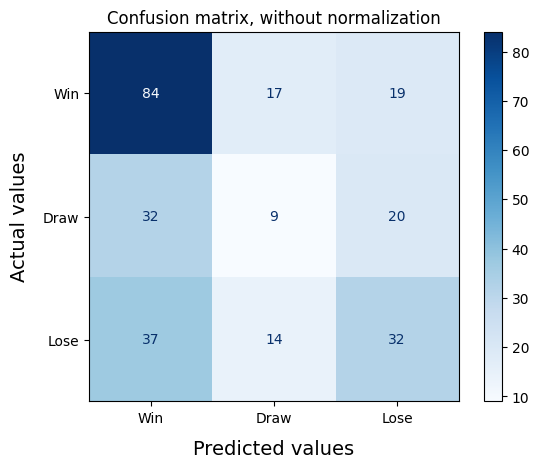

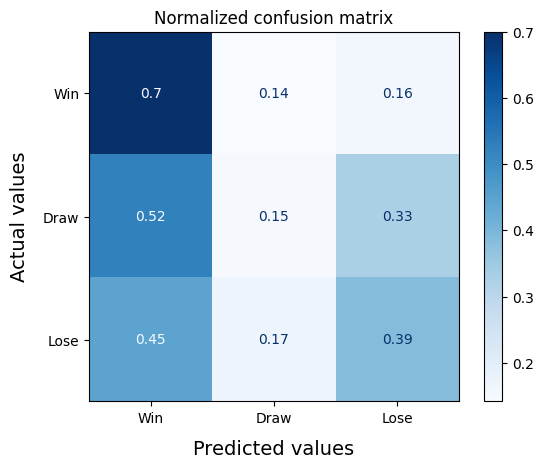

In [39]:
model_Evaluate(classifier_knn_Count)

              precision    recall  f1-score   support

           0       0.53      0.86      0.66       120
           1       1.00      0.03      0.06        61
           2       0.49      0.40      0.44        83

    accuracy                           0.52       264
   macro avg       0.67      0.43      0.39       264
weighted avg       0.62      0.52      0.45       264



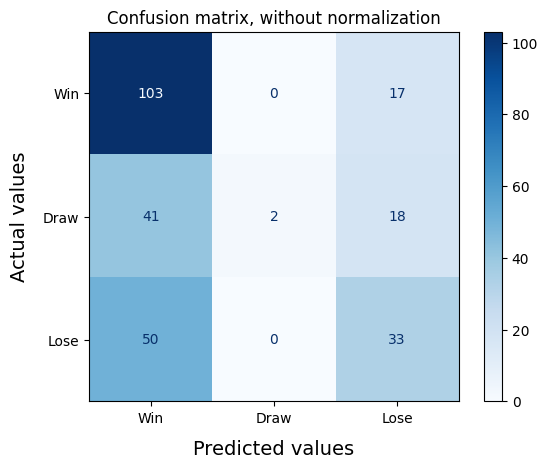

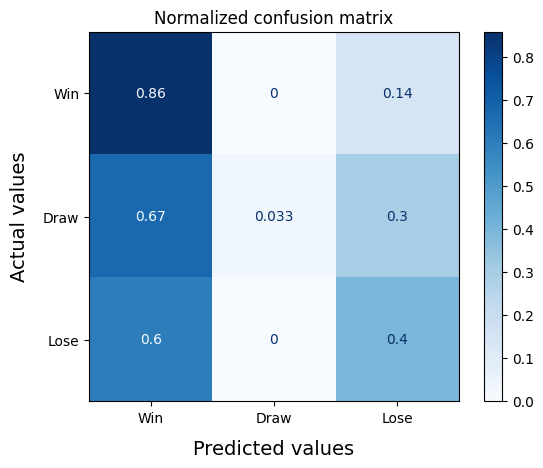

In [42]:
model_Evaluate(classifier_svm_rbf_Count)

              precision    recall  f1-score   support

           0       0.50      0.88      0.63       120
           1       0.33      0.03      0.06        61
           2       0.49      0.28      0.35        83

    accuracy                           0.49       264
   macro avg       0.44      0.39      0.35       264
weighted avg       0.46      0.49      0.41       264



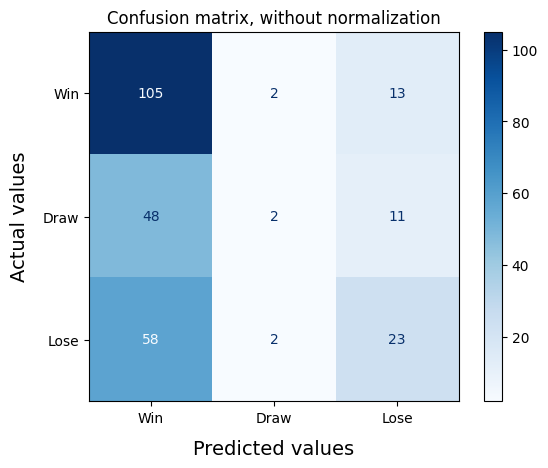

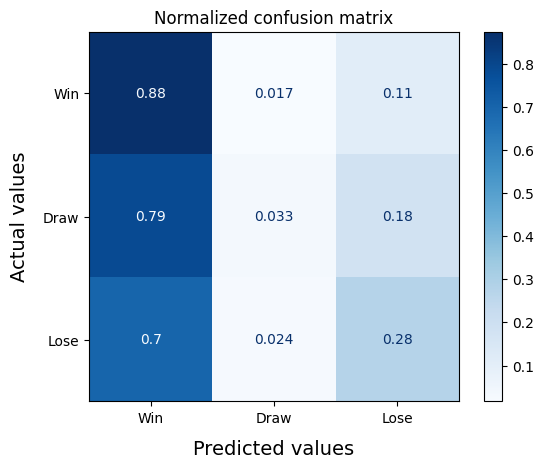

In [45]:
model_Evaluate(classifier_svm_linear_Count)

              precision    recall  f1-score   support

           0       0.58      0.55      0.56       120
           1       0.31      0.36      0.34        61
           2       0.39      0.37      0.38        83

    accuracy                           0.45       264
   macro avg       0.43      0.43      0.43       264
weighted avg       0.46      0.45      0.45       264



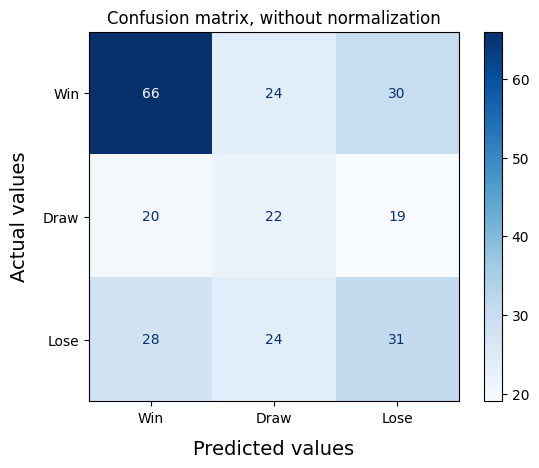

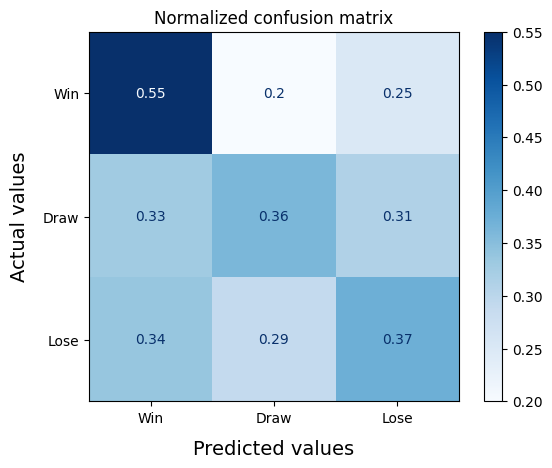

In [49]:
model_Evaluate(classifier_dtree_Count)